<a href="https://colab.research.google.com/github/Tahiana07/ML-Vortex/blob/main/Partie_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Partie A – Clustering
### Dataset : Mall Customer Segmentation Data
Objectif : Segmenter les clients du centre commercial en groupes homogènes.


---

## 1. Chargement : utilisation du fichier Mall_Customers.csv fourni.

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import kagglehub
from kagglehub import KaggleDatasetAdapter

file_path = "Mall_Customers.csv"

# Load the latest version
df_init = df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "vjchoudhary7/customer-segmentation-tutorial-in-python",
  file_path,
)

df = pd.DataFrame(df)
df.head()

/tmp/ipython-input-22-3031534561.py:13: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df_init = df = kagglehub.load_dataset(


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40




---
## 2. Nettoyage et prétraitement : Traitez les valeurs manquantes le cas échéant. Standardisez les variables quantitatives (âge, revenu annuel, score de dépense).


---

- Il n'y a pas des valeurs manquantes

In [23]:
#Chercher les valeurs manquantes
df.isna().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


### Standardiser les variables quantitatives

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[["Age", "Annual Income (k$)", "Spending Score (1-100)"]] = scaler.fit_transform(df[["Age", "Annual Income (k$)", "Spending Score (1-100)"]])
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,-1.424569,-1.738999,-0.434801
1,2,Male,-1.281035,-1.738999,1.195704
2,3,Female,-1.352802,-1.700830,-1.715913
3,4,Female,-1.137502,-1.700830,1.040418
4,5,Female,-0.563369,-1.662660,-0.395980
...,...,...,...,...,...
195,196,Female,-0.276302,2.268791,1.118061
196,197,Female,0.441365,2.497807,-0.861839
197,198,Male,-0.491602,2.497807,0.923953
198,199,Male,-0.491602,2.917671,-1.250054


**Conclusion**
- On a constater qu'il n'y a pas de donnée manquante
les donnee sont deja standardiser

## 3. EDA univariée et multivariée : Histogrammes et boxplots de chaque variable. Matrice de corrélation et scatterplot matrix.

In [25]:
df_init[["Age", "Annual Income (k$)", "Spending Score (1-100)"]].describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


**EDA univarie**

### Histogramme

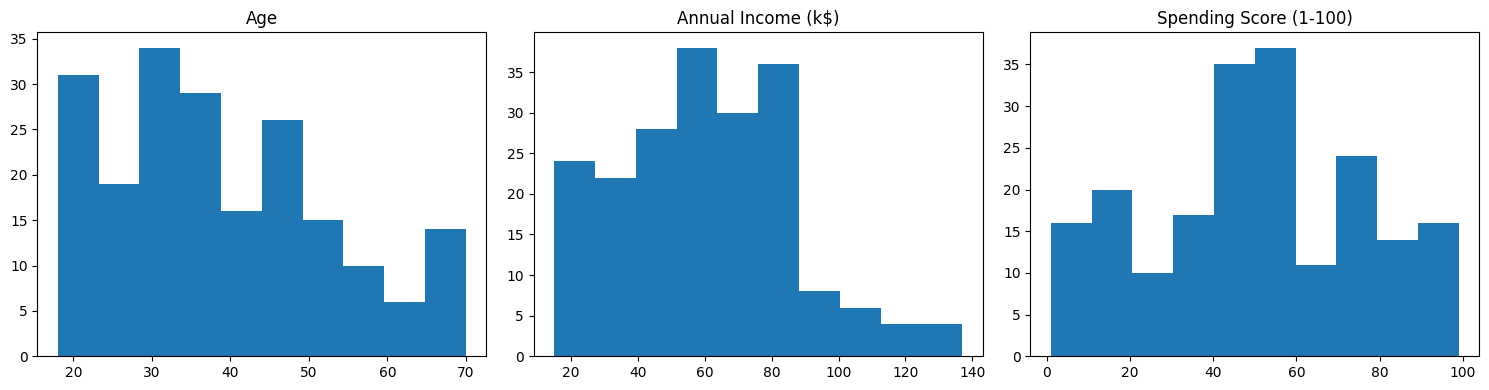

In [26]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for i, col in enumerate(["Age", "Annual Income (k$)", "Spending Score (1-100)"]):
  axes[i].hist(df_init[col])
  axes[i].set_title(col)

plt.tight_layout()
plt.show()

### BoxPlot

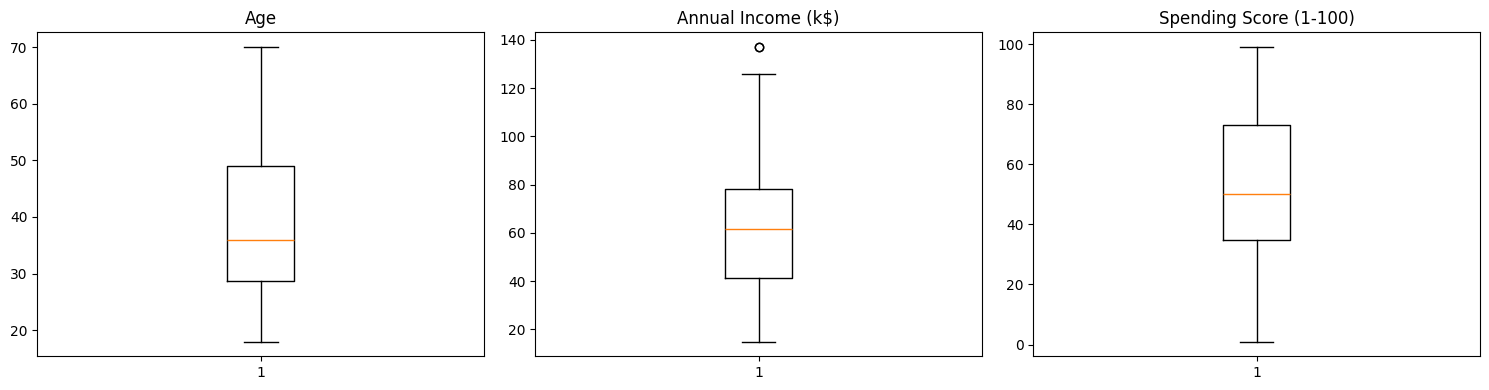

In [27]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for i, col in enumerate(["Age", "Annual Income (k$)", "Spending Score (1-100)"]):
  axes[i].boxplot(df_init[col])
  axes[i].set_title(col)

plt.tight_layout()
plt.show()

EDA miltivarie

### Matrice de corrélation

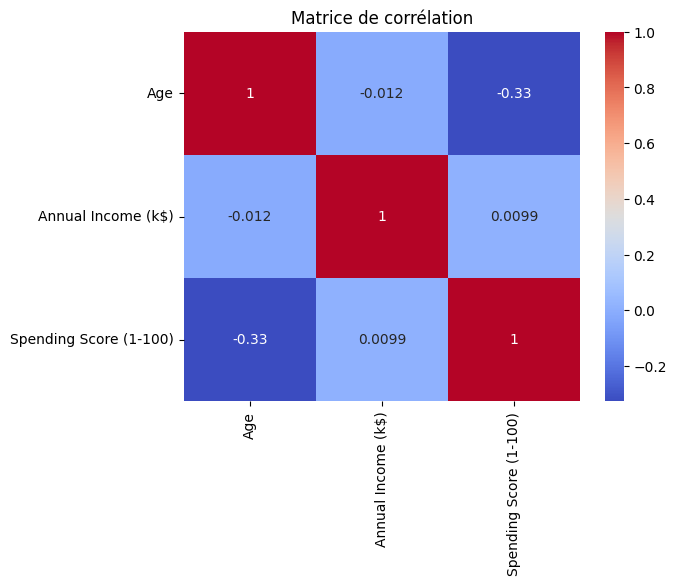

In [28]:
corr = df_init[["Age", "Annual Income (k$)", "Spending Score (1-100)"]].corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Matrice de corrélation")
plt.show()

### Scatterplot matrix

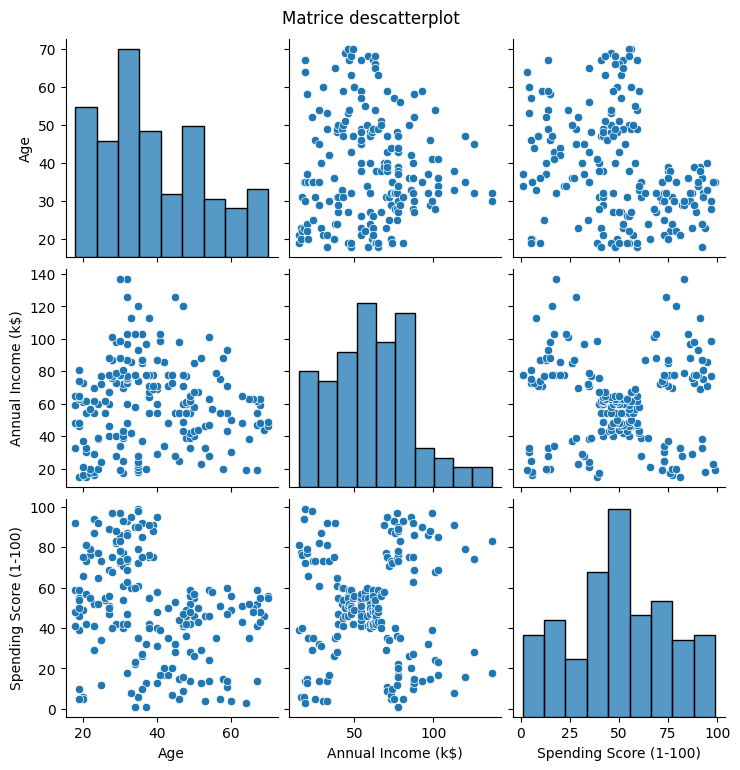

In [29]:
sns.pairplot(df_init[["Age", "Annual Income (k$)", "Spending Score (1-100)"]])
plt.suptitle("Matrice descatterplot", y=1.02)
plt.show()

## 4. Feature engineering / sélection : Supprimez les features non-informatives ou redondantes. (Optionnel) Créez des ratios ou catégorisez des variables (ex. classes d’âge).

In [30]:
#Suppression de la variable CustomerID car c'est inutile
df.drop(columns=["CustomerID"], inplace=True)
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,-1.424569,-1.738999,-0.434801
1,Male,-1.281035,-1.738999,1.195704
2,Female,-1.352802,-1.700830,-1.715913
3,Female,-1.137502,-1.700830,1.040418
4,Female,-0.563369,-1.662660,-0.395980
...,...,...,...,...
195,Female,-0.276302,2.268791,1.118061
196,Female,0.441365,2.497807,-0.861839
197,Male,-0.491602,2.497807,0.923953
198,Male,-0.491602,2.917671,-1.250054


In [31]:
df_init

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [32]:
# Ratio revenu par âge
df_opt = pd.DataFrame(df_init['Annual Income (k$)'] / df_init['Age'], columns=['revenu_par_age'])

# Catégoriser l'âge
def classer_age(age):
    if age < 30:
        return '[18-29]'
    elif age <= 60:
        return '[30-59]'
    else:
        return '[59-]'

df_opt['classe_age'] = df_init['Age'].apply(classer_age)


df_opt

,revenu_par_age,classe_age
0,0.789474,[18-29]
1,0.714286,[18-29]
2,0.800000,[18-29]
3,0.695652,[18-29]
4,0.548387,[30-59]
...,...,...
195,3.428571,[30-59]
196,2.800000,[30-59]
197,3.937500,[30-59]
198,4.281250,[30-59]


## 5. Réduction de dimension : Appliquez une PCA pour visualiser les données en 2D.

In [33]:
#Encoder les valeurs de la variable Gender
df.loc[df['Gender'] == 'Male', 'Gender'] = 0
df.loc[df['Gender'] == 'Female', 'Gender'] = 1
#df[df['Gender'] == 'Female'] = 1
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,-1.424569,-1.738999,-0.434801
1,0,-1.281035,-1.738999,1.195704
2,1,-1.352802,-1.700830,-1.715913
3,1,-1.137502,-1.700830,1.040418
4,1,-0.563369,-1.662660,-0.395980
...,...,...,...,...
195,1,-0.276302,2.268791,1.118061
196,1,0.441365,2.497807,-0.861839
197,0,-0.491602,2.497807,0.923953
198,0,-0.491602,2.917671,-1.250054


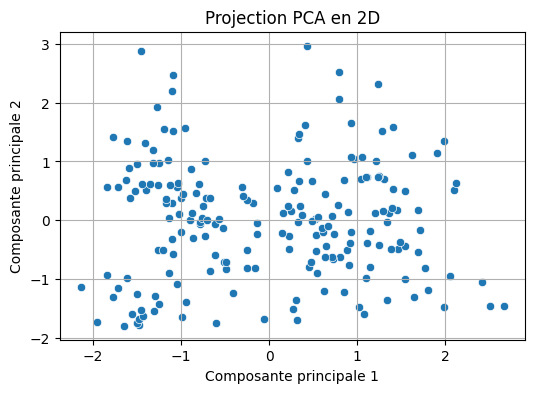

In [34]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df)
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])

#Visualiser
plt.figure(figsize=(6, 4))
sns.scatterplot(x='PC1', y='PC2', data=df_pca)
plt.title("Projection PCA en 2D")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.grid(True)
plt.show()

## 6. Clustering : K-means (k de 2 à 6), Évaluation et stabilité : Calcul des indices (silhouette et elbow)

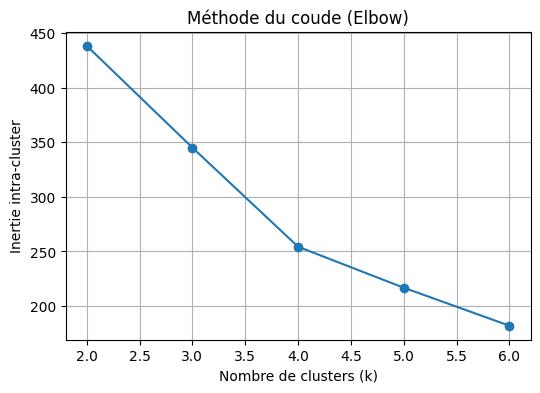

In [35]:
# Méthode du coude (Elbow)
inertias = []
for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(range(2, 7), inertias, marker='o')
plt.title("Méthode du coude (Elbow)")
plt.xlabel("Nombre de clusters (k)")
plt.ylabel("Inertie intra-cluster")
plt.grid(True)
plt.show()

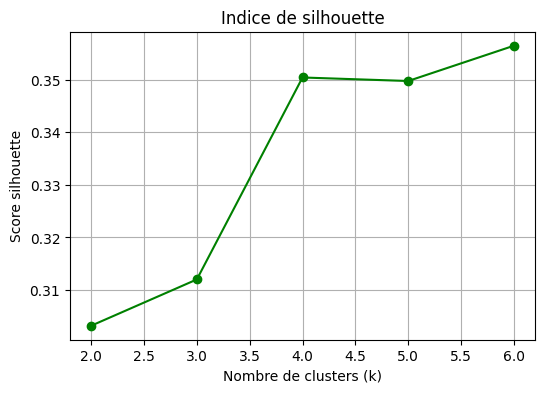

In [36]:
# Indice de silhouette
silhouette_scores = []
for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df)
    score = silhouette_score(df, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(6, 4))
plt.plot(range(2, 7), silhouette_scores, marker='o', color='green')
plt.title("Indice de silhouette")
plt.xlabel("Nombre de clusters (k)")
plt.ylabel("Score silhouette")
plt.grid(True)
plt.show()

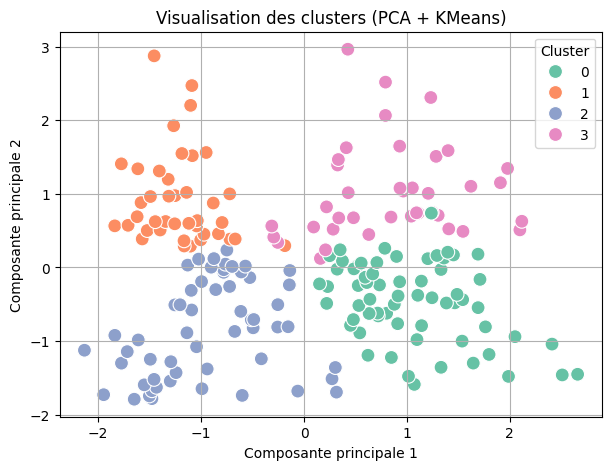

In [37]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
df['cluster'] = kmeans.fit_predict(df)
df_pca['cluster'] = df['cluster']

# Visualisation finale des clusters
plt.figure(figsize=(7, 5))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='cluster', palette='Set2', s=100)
plt.title("Visualisation des clusters (PCA + KMeans)")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()

##7. Interprétation des clusters : Analyse des centroïdes ou profils, visualisation en 2D (PCA) colorée par cluster.

In [38]:
# Moyenne de chaque variable pour chaque cluster
profils = df.groupby('cluster').mean(numeric_only=True)
print(profils)

              Age  Annual Income (k$)  Spending Score (1-100)
cluster                                                      
0        1.080537           -0.504457               -0.379602
1       -0.428806            0.974847                1.216085
2       -0.962492           -0.784763                0.392030
3        0.073331            0.974945               -1.197297


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


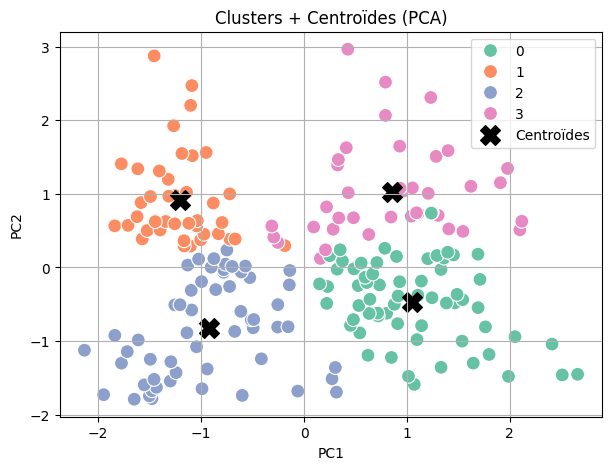

In [39]:
# Projeter les centroïdes en 2D (PCA)
centroids_pca = pca.transform(kmeans.cluster_centers_[:, :4])

plt.figure(figsize=(7, 5))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='cluster', palette='Set2', s=100)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='black', marker='X', s=200, label='Centroïdes')
plt.title("Clusters + Centroïdes (PCA)")
plt.legend()
plt.grid(True)
plt.show()

## 8. Conclusions : Synthèse de la pertinence des clusters et suggestions d’améliorations.

#Conclusions

L'analyse par clustering K-Means a permis de segmenter les clients du centre commercial en plusieurs groupes distincts, révélant des profils de consommateurs variés basés sur l'âge, le revenu annuel et le score de dépense. L'examen des centroïdes de chaque cluster a offert des aperçus précieux sur les caractéristiques démographiques et les habitudes de dépense spécifiques à chaque segment. La visualisation des clusters sur les deux premières composantes principales de la PCA a également confirmé la séparation visuelle des groupes identifiés.

La pertinence de ces clusters réside dans leur potentiel à informer des stratégies marketing ciblées. Par exemple, identifier un groupe de clients jeunes avec un score de dépense élevé pourrait justifier des campagnes promotionnelles axées sur les dernières tendances, tandis qu'un groupe de clients plus âgés avec un revenu élevé pourrait être sensible à des offres de produits premium ou des programmes de fidélité.

Pour améliorer davantage cette segmentation, plusieurs pistes peuvent être explorées. L'intégration de données supplémentaires, telles que la fréquence des visites, les types d'achats réalisés, ou les préférences de produits spécifiques, pourrait enrichir les profils clients. L'évaluation de méthodes de clustering alternatives, comme le clustering hiérarchique ou DBSCAN, pourrait également révéler des structures de données différentes et potentiellement plus fines. Enfin, une analyse plus approfondie de la stabilité des clusters (par exemple, en utilisant des techniques de bootstrapping) permettrait d'assurer la robustesse de la segmentation obtenue.